# Statystyczna analiza danych

In [ ]:
Projekt słuchaczy studiów podyplomowych z przedmiotu Statystyczna Analiza Danych na kierunku >>> : Kinga Kaza, Krzysztof Lachs, Joanna Mackiewicz (kolejność alfabetyczna).

## Wprowadzenie

Tematem projektu jest analiza zbioru danych dotyczących szczęścia na świecie. Wykorzystamy w tym celu  raport World Happiness Report, który jest dostępny na platformie Kaggle. 
Zbiór danych zawiera informacje o poziomie szczęścia w różnych krajach na świecie, a także różne czynniki wpływające na to szczęście, takie jak PKB na mieszkańca, wsparcie społeczne,
oczekiwana długość życia w zdrowiu, poczucie wolności w podejmowaniu życiowych decyzji, hojność oraz postrzeganie korupcji.
World Hapoiness Report (Raport Światowego Szczęścia) to globalne badanie opinii na temat poziomu zadowolenia z życia na świecie.
Wyniki raportu opierają się na danych pochodzących z Gallup World Poll. Głównym źródłem jest odpowiedź na tzw. "drabinę Cantrila", w której respondenci proszeni są o ocenę swojego życia w skali od 0 do 10, gdzie 10 oznacza najlepsze możliwe życie, a 0 – najgorsze.
Wartości te porównywane są do fikcyjnego kraju o nazwie Dystopia, który stanowi punkt odniesienia z najniższymi wynikami we wszystkich tych kategoriach (czynniki te nie wpływają bezpośrednio na końcową ocenę kraju).

Korzystając z tego zbioru danych, przeprowadzimy analizę statystyczną i wizualizację danych, aby lepiej zrozumieć, jakie czynniki wpływają na poziom szczęścia w różnych krajach. 
Rozpatrzymy również te dane w kontekście różnych regionów świata, sytuacji politycznej i gospodarczej, a także innych czynników społecznych i kulturowych panujących w danym kraju 
w analizowanym okresie czasu. 
Na koniec spróbujemy znaleźć odpowiedź na pyatnie w jaki sposób pandemia COVID-19 wpłynęła na poziom szczęścia w różnych krajach i regionach świata.


Najpierw zainstalujemy bibliotekę kagglehub, która umożliwia pobieranie zbiorów danych z platformy Kaggle oraz poznane na wykładach bilibioteki wspomagających analizę 
i wizualizację danych w pythonie. 

In [3]:

#import wszystkich potrzebnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import kagglehub


# Zaimportowanie ramek danych z Kaggle
path = kagglehub.dataset_download("mathurinache/world-happiness-report")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

W celu przeprowadzenia analizy szczęścia na świecie w latach 2015 - 2022 wczytamy ramki danych, a nastepnie je połączymy i umieścimy ją w jedenj liście. 

In [5]:
df_2015 = pd.read_csv(path + "/2015.csv")
df_2016 = pd.read_csv(path + "/2016.csv")
df_2017 = pd.read_csv(path + "/2017.csv")
df_2018 = pd.read_csv(path + "/2018.csv")
df_2019 = pd.read_csv(path + "/2019.csv")
df_2020 = pd.read_csv(path + "/2020.csv")
df_2021 = pd.read_csv(path + "/2021.csv")
df_2022 = pd.read_csv(path + "/2022.csv")

NameError: name 'path' is not defined

In [56]:
# Umieszanie wszystkich ramek danych w jednej liście w celu łatwiejszej iteracji
df_list = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]


W następnym punkcie przeanalizujemy zbiór danych w celu wybrana danych przydatnych do analizy interesujących nas problemów oraz ujednolicenia tych danych. 
Dokonamy również czyszczenia i identyfikacji braków danych.   

In [ ]:
# ToDo:
# Opis datasetow - co mamy? Opis kolumn.
# Opisanie metody Cantril Ladder
# Histogramy Happiness Score
# Datasety w czasach COVID-19


Koniecznosc operacji masowach, poniewaz mamy wiele ramek danych. Dlatego wiele operacji bedzie wykonywanych w petlach

## Czyszczenie i porządkowanie danych

In [55]:
#ToDo:
# Ujednolicenie nazw kolumn i kolejnosc
# Dopasowanie typów danych
# Uzupełnienie brakujących danych 

In [57]:
dfs_dict = {'rok_2015': df_2015, 'rok_2016': df_2016, 'rok_2017': df_2017, 'rok_2018': df_2018,  'rok_2019': df_2019, 'rok_2020': df_2020, 'rok_2021': df_2021, 'rok_2022': df_2022}

In [82]:
df_2018['Country or region'].head(50)

0                  Finland
1                   Norway
2                  Denmark
3                  Iceland
4              Switzerland
5              Netherlands
6                   Canada
7              New Zealand
8                   Sweden
9                Australia
10          United Kingdom
11                 Austria
12              Costa Rica
13                 Ireland
14                 Germany
15                 Belgium
16              Luxembourg
17           United States
18                  Israel
19    United Arab Emirates
20          Czech Republic
21                   Malta
22                  France
23                  Mexico
24                   Chile
25                  Taiwan
26                  Panama
27                  Brazil
28               Argentina
29               Guatemala
30                 Uruguay
31                   Qatar
32            Saudi Arabia
33               Singapore
34                Malaysia
35                   Spain
36                Colombia
3

In [80]:
df_2019['Country or region']

0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 156, dtype: object

### Przejrzymy nazwy kolumn

In [59]:
if not df_list:
    print(" 'df_list' jest pusta.")
else:
    for i, df in enumerate(df_list):
        print(f"--- Rok {i+2015}  ---")

        if isinstance(df, pd.DataFrame):
            column_names = df.columns.tolist()
            print("Nazwy kolumn:")
            if column_names:
                for col_name in column_names:
                    print(f"- {col_name}")
            else:
                print("(Ta ramka nie zawiera kolumn.)")
        else:
            print(f"Element {i} nie jest typem Pandas DataFrame. Type: {type(df)}")
        print("\n") 

    print("--- Koniec procesu ---")

--- Rok 2015  ---
Nazwy kolumn:
- Country
- Region
- Happiness Rank
- Happiness Score
- Standard Error
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
- Dystopia Residual


--- Rok 2016  ---
Nazwy kolumn:
- Country
- Region
- Happiness Rank
- Happiness Score
- Lower Confidence Interval
- Upper Confidence Interval
- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity
- Dystopia Residual


--- Rok 2017  ---
Nazwy kolumn:
- Country
- Happiness.Rank
- Happiness.Score
- Whisker.high
- Whisker.low
- Economy..GDP.per.Capita.
- Family
- Health..Life.Expectancy.
- Freedom
- Generosity
- Trust..Government.Corruption.
- Dystopia.Residual


--- Rok 2018  ---
Nazwy kolumn:
- Overall rank
- Country or region
- Score
- GDP per capita
- Social support
- Healthy life expectancy
- Freedom to make life choices
- Generosity
- Perceptions of corruption


--- Rok 2019  ---
Na

#### Stworzenie df, ktora podsumowuje wszystkie df

In [60]:
from IPython.display import display, HTML

# Nazwy kolumn wylistowane po przecinku
summary_data = []
for i, df in enumerate(df_list):
    if isinstance(df, pd.DataFrame):
        summary_data.append({
            "Indeks": f"Rok {i+2015}",
            "Liczba kolumn": len(df.columns),
            "Nazwy kolumn": ", ".join(df.columns.tolist())
        })
    else:
        summary_data.append({
            "Indeks": f"Item {i+1}",
            "Liczba kolumn": "N/A (Not a DataFrame)",
            "Nazwy kolumn": "N/A"
        })

summary_df_str = pd.DataFrame(summary_data)


# Styl tabeli
styles = [
    dict(selector="th", props=[("text-align", "left")]),
     dict(selector="td", props=[("text-align", "left")]),
     dict(selector="td:nth-child(3)", props=[("min-width", "100px")])
 ]
display(summary_df_str.style.set_table_styles(styles))


,Indeks,Liczba kolumn,Nazwy kolumn
0,Rok 2015,12,"Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
1,Rok 2016,13,"Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
2,Rok 2017,12,"Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual"
3,Rok 2018,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
4,Rok 2019,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
5,Rok 2020,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
6,Rok 2021,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Explained by: Log GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption, Dystopia + residual"
7,Rok 2022,12,"RANK, Country, Happiness score, Whisker-high, Whisker-low, Dystopia (1.83) + residual, Explained by: GDP per capita, Explained by: Social support, Explained by: Healthy life expectancy, Explained by: Freedom to make life choices, Explained by: Generosity, Explained by: Perceptions of corruption"


In [70]:
df_2021

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


Można zauważyc, że dane nie są jednolite. w zależności od roku df posiada od 9 do 20 kolumn

In [61]:
# Załóżmy, że Twoje DataFrame'y są teraz w słowniku
# dfs_dict = {
#     'dane_za_2020': df_2020,
#     'dane_za_2021': df_2021,
#     'dane_za_2022': df_2022
# }

# Sprawdzanie brakujących wartości w każdym z DataFrame'ów
for name, df in dfs_dict.items():
    # Oblicz sumę brakujących wartości dla każdej kolumny
    missing_values = df.isnull().sum()

    # Sprawdź, czy w ogóle istnieją jakieś brakujące wartości
    if missing_values.any():
        print(f"DataFrame '{name}' ma brakujące wartości w kolumnach:")
        # Wyświetl tylko te kolumny, w których brakuje danych
        print(missing_values[missing_values > 0])
        print("-" * 40)  # Separator dla lepszej czytelności
    else:
        print(f"{name} nie ma brakujących wartości.")

print("\n--- Zakończono sprawdzanie brakujących wartości ---")


rok_2015 nie ma brakujących wartości.
rok_2016 nie ma brakujących wartości.
rok_2017 nie ma brakujących wartości.
DataFrame 'rok_2018' ma brakujące wartości w kolumnach:
Perceptions of corruption    1
dtype: int64
----------------------------------------
rok_2019 nie ma brakujących wartości.
rok_2020 nie ma brakujących wartości.
rok_2021 nie ma brakujących wartości.
DataFrame 'rok_2022' ma brakujące wartości w kolumnach:
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64
----------------------------------------

--- Zakończono sprawdzanie brakujących w

In [62]:
# Wyświetl wiersze, w których brakuje wartości TYLKO w kolumnie 'sprzedaz'
#rows_missing_in_sales = df_2022[df_2022['sprzedaz'].isnull()]
#print(rows_missing_in_sales)


## Ujednolicenia nazw kolumn

In [63]:
#

dfs = [df_2020, df_2021, df_2022]
for df in dfs:
    df.columns = df.columns.str.replace(r'^Explained by: ', '', regex=True)


In [64]:
df_2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [65]:
from IPython.display import display, HTML

# Nazwy kolumn wylistowane po przecinku
summary_data = []
for i, df in enumerate(df_list):
    if isinstance(df, pd.DataFrame):
        summary_data.append({
            "Indeks": f"Rok {i+2015}",
            "Liczba kolumn": len(df.columns),
            "Nazwy kolumn": ", ".join(df.columns.tolist())
        })
    else:
        summary_data.append({
            "Indeks": f"Item {i+1}",
            "Liczba kolumn": "N/A (Not a DataFrame)",
            "Nazwy kolumn": "N/A"
        })

summary_df_str = pd.DataFrame(summary_data)


# Styl tabeli
styles = [
    dict(selector="th", props=[("text-align", "left")]),
     dict(selector="td", props=[("text-align", "left")]),
     dict(selector="td:nth-child(3)", props=[("min-width", "100px")])
 ]
display(summary_df_str.style.set_table_styles(styles))

,Indeks,Liczba kolumn,Nazwy kolumn
0,Rok 2015,12,"Country, Region, Happiness Rank, Happiness Score, Standard Error, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
1,Rok 2016,13,"Country, Region, Happiness Rank, Happiness Score, Lower Confidence Interval, Upper Confidence Interval, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity, Dystopia Residual"
2,Rok 2017,12,"Country, Happiness.Rank, Happiness.Score, Whisker.high, Whisker.low, Economy..GDP.per.Capita., Family, Health..Life.Expectancy., Freedom, Generosity, Trust..Government.Corruption., Dystopia.Residual"
3,Rok 2018,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
4,Rok 2019,9,"Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"
5,Rok 2020,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual"
6,Rok 2021,20,"Country name, Regional indicator, Ladder score, Standard error of ladder score, upperwhisker, lowerwhisker, Logged GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Ladder score in Dystopia, Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption, Dystopia + residual"
7,Rok 2022,12,"RANK, Country, Happiness score, Whisker-high, Whisker-low, Dystopia (1.83) + residual, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption"


In [103]:
df_2020["Regional indicator"].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [87]:
for name, df in dfs_dict.items():
    # Sprawdź, która kolumna istnieje
    if 'Country or region' in df.columns:
        col = 'Country or region'
    elif 'Country' in df.columns:
        col = 'Country'
    else:
        print(f"{name}: brak wymaganej kolumny")
        continue

    # Przeglądanie wartości w wybranej kolumnie
    for value in df[col]:
        print(f"{name}: {value}")


rok_2015: Switzerland
rok_2015: Iceland
rok_2015: Denmark
rok_2015: Norway
rok_2015: Canada
rok_2015: Finland
rok_2015: Netherlands
rok_2015: Sweden
rok_2015: New Zealand
rok_2015: Australia
rok_2015: Israel
rok_2015: Costa Rica
rok_2015: Austria
rok_2015: Mexico
rok_2015: United States
rok_2015: Brazil
rok_2015: Luxembourg
rok_2015: Ireland
rok_2015: Belgium
rok_2015: United Arab Emirates
rok_2015: United Kingdom
rok_2015: Oman
rok_2015: Venezuela
rok_2015: Singapore
rok_2015: Panama
rok_2015: Germany
rok_2015: Chile
rok_2015: Qatar
rok_2015: France
rok_2015: Argentina
rok_2015: Czech Republic
rok_2015: Uruguay
rok_2015: Colombia
rok_2015: Thailand
rok_2015: Saudi Arabia
rok_2015: Spain
rok_2015: Malta
rok_2015: Taiwan
rok_2015: Kuwait
rok_2015: Suriname
rok_2015: Trinidad and Tobago
rok_2015: El Salvador
rok_2015: Guatemala
rok_2015: Uzbekistan
rok_2015: Slovakia
rok_2015: Japan
rok_2015: South Korea
rok_2015: Ecuador
rok_2015: Bahrain
rok_2015: Italy
rok_2015: Bolivia
rok_2015: Mold

In [88]:
# Krok 1: Zbierz wszystkie unikalne kraje ze wszystkich DataFrame'ów
all_countries = set()

for df in dfs_dict.values():
    if 'Country or region' in df.columns:
        all_countries.update(df['Country or region'].dropna().unique())
    elif 'Country' in df.columns:
        all_countries.update(df['Country'].dropna().unique())

# Krok 2: Porównaj każdy DataFrame z pełną listą krajów
for name, df in dfs_dict.items():
    if 'Country or region' in df.columns:
        countries = set(df['Country or region'].dropna().unique())
    elif 'Country' in df.columns:
        countries = set(df['Country'].dropna().unique())
    else:
        print(f"{name}: brak wymaganej kolumny")
        continue

    missing = all_countries - countries
    if missing:
        print(f"{name}: brakuje krajów: {sorted(missing)}")
    else:
        print(f"{name}: wszystkie kraje obecne")


rok_2015: brakuje krajów: ['Azerbaijan*', 'Belarus*', 'Belize', 'Botswana*', 'Chad*', 'Comoros*', 'Congo', 'Czechia', 'Eswatini, Kingdom of*', 'Gambia', 'Gambia*', 'Guatemala*', 'Hong Kong S.A.R. of China', 'Hong Kong S.A.R., China', 'Kuwait*', 'Lesotho*', 'Liberia*', 'Libya*', 'Luxembourg*', 'Madagascar*', 'Mauritania*', 'Namibia', 'Niger*', 'North Cyprus*', 'North Macedonia', 'Northern Cyprus', 'Palestinian Territories*', 'Puerto Rico', 'Rwanda*', 'Somalia', 'Somaliland Region', 'South Sudan', 'Taiwan Province of China', 'Trinidad & Tobago', 'Turkmenistan*', 'Yemen*', 'xx']
rok_2016: brakuje krajów: ['Azerbaijan*', 'Belarus*', 'Botswana*', 'Central African Republic', 'Chad*', 'Comoros*', 'Congo', 'Czechia', 'Djibouti', 'Eswatini, Kingdom of*', 'Gambia', 'Gambia*', 'Guatemala*', 'Hong Kong S.A.R. of China', 'Hong Kong S.A.R., China', 'Kuwait*', 'Lesotho', 'Lesotho*', 'Liberia*', 'Libya*', 'Luxembourg*', 'Madagascar*', 'Mauritania*', 'Mozambique', 'Niger*', 'North Cyprus*', 'North Mace

In [100]:
df_2016.Country.values

array(['Denmark', 'Switzerland', 'Iceland', 'Norway', 'Finland', 'Canada',
       'Netherlands', 'New Zealand', 'Australia', 'Sweden', 'Israel',
       'Austria', 'United States', 'Costa Rica', 'Puerto Rico', 'Germany',
       'Brazil', 'Belgium', 'Ireland', 'Luxembourg', 'Mexico',
       'Singapore', 'United Kingdom', 'Chile', 'Panama', 'Argentina',
       'Czech Republic', 'United Arab Emirates', 'Uruguay', 'Malta',
       'Colombia', 'France', 'Thailand', 'Saudi Arabia', 'Taiwan',
       'Qatar', 'Spain', 'Algeria', 'Guatemala', 'Suriname', 'Kuwait',
       'Bahrain', 'Trinidad and Tobago', 'Venezuela', 'Slovakia',
       'El Salvador', 'Malaysia', 'Nicaragua', 'Uzbekistan', 'Italy',
       'Ecuador', 'Belize', 'Japan', 'Kazakhstan', 'Moldova', 'Russia',
       'Poland', 'South Korea', 'Bolivia', 'Lithuania', 'Belarus',
       'North Cyprus', 'Slovenia', 'Peru', 'Turkmenistan', 'Mauritius',
       'Libya', 'Latvia', 'Cyprus', 'Paraguay', 'Romania', 'Estonia',
       'Jamaica', 'Croa

## Wizualizacje 

Generating 8 histograms in a 4x2 grid for column 'your_column_name'.


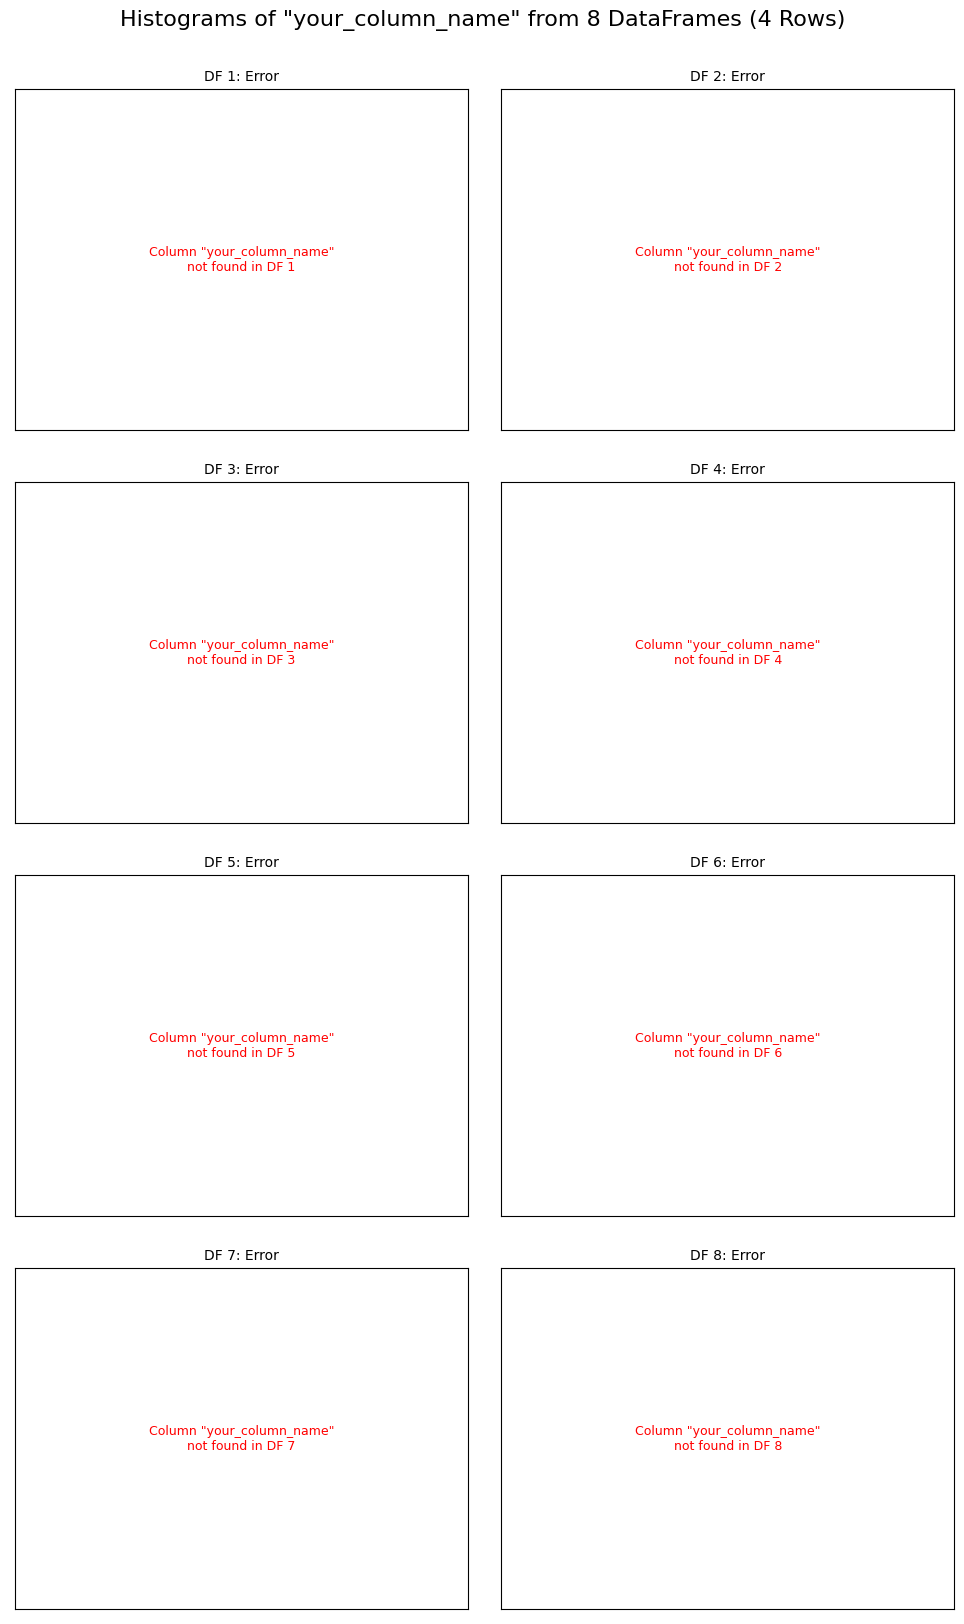

In [67]:

# --- 1. Specify the column you want to plot ---
# IMPORTANT: Replace 'your_column_name' with the actual name of the column
# you want to generate a histogram for from each DataFrame.
column_to_plot = 'your_column_name' # <<< CHANGE THIS TO YOUR COLUMN NAME

# --- 2. Plotting Logic ---
if not 'df_list' in locals() or not df_list:
    print("It seems 'df_list' is not defined or is empty.")
    print("Please ensure your df_list is populated with DataFrames.")
else:
    num_dfs = len(df_list)

    if num_dfs == 0:
        print("Your df_list is empty. Nothing to plot!")
    else:
        # Define the number of rows for your subplot grid
        nrows = 4
        # Calculate the number of columns needed
        ncols = math.ceil(num_dfs / nrows)

        # Create the figure and subplots
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 4))

        # Flatten the axes array for easier iteration
        if num_dfs == 1:
            if not isinstance(axes, np.ndarray):
                axes_flat = [axes]
            else:
                axes_flat = axes.flatten()
        elif nrows == 1 or ncols == 1:
             axes_flat = axes if isinstance(axes, np.ndarray) else [axes] # Ensure it's iterable
             if isinstance(axes_flat, np.ndarray) and axes_flat.ndim > 1 : # if it was 1 row N cols or N rows 1 col
                 axes_flat = axes_flat.flatten()
        else:
            axes_flat = axes.flatten()

        print(f"Generating {num_dfs} histograms in a {nrows}x{ncols} grid for column '{column_to_plot}'.")

        for i, df in enumerate(df_list):
            ax = axes_flat[i]

            if column_to_plot in df.columns:
                sns.histplot(data=df, x=column_to_plot, ax=ax, kde=True)
                ax.set_title(f'DF {i+1}: {column_to_plot}', fontsize=10)
                ax.set_xlabel(column_to_plot, fontsize=8)
                ax.set_ylabel('Frequency', fontsize=8)
                ax.tick_params(axis='both', which='major', labelsize=7)
            else:
                ax.text(0.5, 0.5, f'Column "{column_to_plot}"\nnot found in DF {i+1}',
                        horizontalalignment='center', verticalalignment='center',
                        transform=ax.transAxes, fontsize=9, color='red')
                ax.set_title(f'DF {i+1}: Error', fontsize=10)
                ax.set_xticks([])
                ax.set_yticks([])

        # Hide any unused subplots
        for j in range(num_dfs, len(axes_flat)):
            fig.delaxes(axes_flat[j])

        plt.tight_layout(pad=2.0)
        plt.suptitle(f'Histograms of "{column_to_plot}" from {num_dfs} DataFrames (4 Rows)', fontsize=16, y=1.02)
        plt.show()

## Analiza opisowa

- przyjrzenie się krajom, ktore mają najwyższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają najniższy wskaźnik szczęścia
- przyjrzenie się krajom, ktore mają największy wzrost wskaźnika szczęścia
- przyjrzenie się krajom, ktore mają największy spadek wskaźnika szczęścia
- czy COVID-19 miał wpływ na wskaźnik szczęścia?

## Wnioski

In [68]:
#TBD